# Spam SMS Classification Project  

## Overview  
In this project, we will analyze and process the **Spam SMS dataset** to build a machine learning model that classifies messages as **Spam** or **Not Spam**.  

## Steps  

1. **Data Preprocessing**  
   - Load the dataset  
   - Handle missing values (if any)  
   - Convert text labels to numerical format  
   - Perform text cleaning (removing punctuation, stopwords,mbeddings)  

2. **Exploratory Data Analysis (EDA)**  
   - Visualizing spam vs. non-spam distribution  
   - Analyzing word frequencies  
   - Checking for data imbalances  

3. **Feature Engineering**  
   - Extracting relevant text features  
   - Creating new features if needed  

4. **Modeling**  
   - Train different machine learning models (Logistic Regression, Naïve Bayes, etc.)  
   - Evaluate performance using accuracy, precision, recall, and F1-score  
   - Fiessages and get predictions  

## Expected Outcome  
A trained machine learning model that accurately classifies SMS messages as **Spam** or **Not Spam**.  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string


import warnings
warnings.filterwarnings("ignore")


# 1. Load and prepare the dataset
# Read the CSV file
spam_df = pd.read_csv('Spam_SMS.csv')

# <h3> Understanding the Code: Loading and Preparing the Dataset</h3>  
This Python script is designed to <b>load and prepare</b> a dataset (<code>Spam_SMS.csv</code>) for further analysis.  
Below is a step-by-step breakdown of the code.  

## <h4>🔹 Step 1: Import Necessary Libraries</h4>  
<b> What This Does:</b>  
<ul>
<li><code>pandas (pd)</code> → For handling data in <b>DataFrames</b>.</li>  
<li><code>numpy (np)</code> → Provides support for numerical operations.</li>  
<li><code>matplotlib.pyplot (plt)</code> → Used for <b>visualization</b> and plotting graphs.</li>  
<li><code>string</code> → Contains useful string operations (e.g., removing punctuation).</li>  
</ul>  

## <h4> Step 2: Suppress Warnings</h4>  
<b> Why This is Important?</b>  
<ul>
<li><code>warnings.filterwarnings("ignore")</code> prevents unnecessary warnings from cluttering the output.</li>  
<li>Useful when working with large datasets or libraries that may raise non-critical warnings.</li>  
</ul>  

## <h4> Step 3: Load the Dataset</h4>  
<b>Explanation:</b>  
<ul>
<li>Reads the dataset from a CSV file (<code>Spam_SMS.csv</code>).</li>  
<li>Stores the data in a <b>pandas DataFrame (<code>spam_df</code>)</b>, which allows easy manipulation and analysis.</li>  
</ul>  

<hr>  

Now, the dataset is ready for <b>exploratory data analysis (EDA)</b> and preprocessing! 🚀 

In [4]:
# Display first few rows
spam_df.head()


,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:

# Display the shape of the dataframe
print('DataFrame shape: ' + str(spam_df.shape))
print('DataFrame shape: ' + str(spam_df.info()))
# Check for missing values
print("\nMissing Values:\n", spam_df.isnull().sum())

# Data distribution
print("\nClass Distribution:\n", spam_df['Class'].value_counts())

DataFrame shape: (5574, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
DataFrame shape: None

Missing Values:
 Class      0
Message    0
dtype: int64

Class Distribution:
 Class
ham     4827
spam     747
Name: count, dtype: int64


In [6]:
# Check for duplicates
print("Duplicate messages:", spam_df.duplicated().sum())
# Remove duplicates
spam_df = spam_df.drop_duplicates()
print("Duplicate messages:", spam_df.duplicated().sum())
# Display the shape of the dataframe
print('DataFrame shape after removing the duplicates: ' + str(spam_df.shape))

# Data distribution
print("\nClass Distribution after removing the duplicates:\n", spam_df['Class'].value_counts())

Duplicate messages: 415
Duplicate messages: 0
DataFrame shape after removing the duplicates: (5159, 2)

Class Distribution after removing the duplicates:
 Class
ham     4518
spam     641
Name: count, dtype: int64


# **Why Do We Need to Drop Duplicate Messages?**

Duplicate messages can negatively affect the performance of our machine learning model. Below are the key reasons why we **must** remove them before training:

---

## **🔹 1️⃣ Prevent Model Bias**
- The model may become **biased** toward frequently repeated messages.  
- Instead of learning **generalizable features**, it **overfits** to common patterns.  

## **🔹 2️⃣ Improve Generalization**
- If the model memorizes duplicates, it may **struggle** with unseen messages.  
- Removing duplicates helps the model **learn diverse message structures**.  

## **🔹 3️⃣ Maintain Class Balance**
- If duplicates exist **more in spam than ham (or vice versa)**, the dataset’s class ratio **becomes skewed**.  
- This misleads the model into **over-prioritizing one class**, reducing accuracy.  

## **🔹 4️⃣ Avoid Inflated Accuracy**
- If duplicates exist in both **training and test data**, the model may perform **artificially well** on the test set.  
- In reality, its performance on **new data** may be much worse.  

---

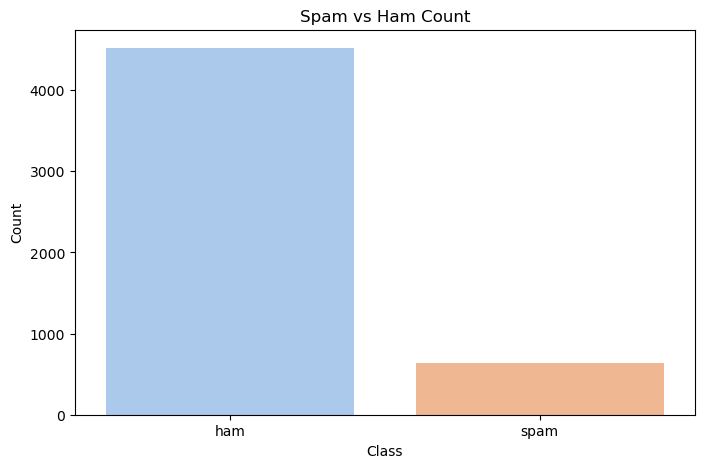

In [8]:
# Plotting distribution of spam vs ham
plt.figure(figsize=(8,5))
sns.countplot(data=spam_df, x='Class', palette='pastel')
plt.title('Spam vs Ham Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

warnings.filterwarnings("ignore")

# Insights from the Spam vs. Ham Count Plot

## 1. **Ham Messages Dominate the Dataset**
   - The dataset contains significantly **more ham messages** than spam messages.
   - Ham messages outnumber spam messages by a large margin.

## 2. **Class Imbalance**
   - The dataset is **imbalanced**, with a much higher count of ham messages.
   - This imbalance can affect machine learning models, potentially causing bias toward the majority class.

## 3. **Implications for Classification**
   - Due to the class imbalance, **oversampling spam messages** or **undersampling ham messages** may be needed for better model performance.
   - Other techniques like **SMOTE (Synthetic Minority Over-sampling Technique)** can help balance the dataset.

### **Key Takeaways**
- **Ham messages are far more common** than spam in this dataset.
- **Class imbalance is present**, which must be handled in spam classification tasks.


In [10]:
# Create a message length feature
spam_df['Message_Length'] = spam_df['Message'].apply(len)
print("The maximumum length",spam_df['Message_Length'].max())
print("The minimum length",spam_df['Message_Length'].min())

The maximumum length 910
The minimum length 2


# Message Length Feature Creation

## Overview  
To improve our spam classification model, we create a new feature called **Message_Length**, which represents the number of characters in each SMS message.  

## Why is Message Length Important?  
1. **Spam messages tend to be longer**: Promotional and fraudulent messages often contain more details and links.  
2. **Ham messages are usually shorter**: Normal conversations tend to be brief and to the point.  
3. **Helps in feature engineering**: Message length can be used as an additional input for machine learning models.  

## Expected Outcome  
Adding this feature allows our model to better differentiate between **spam and ham messages**, improving overall classification accuracy.  
  

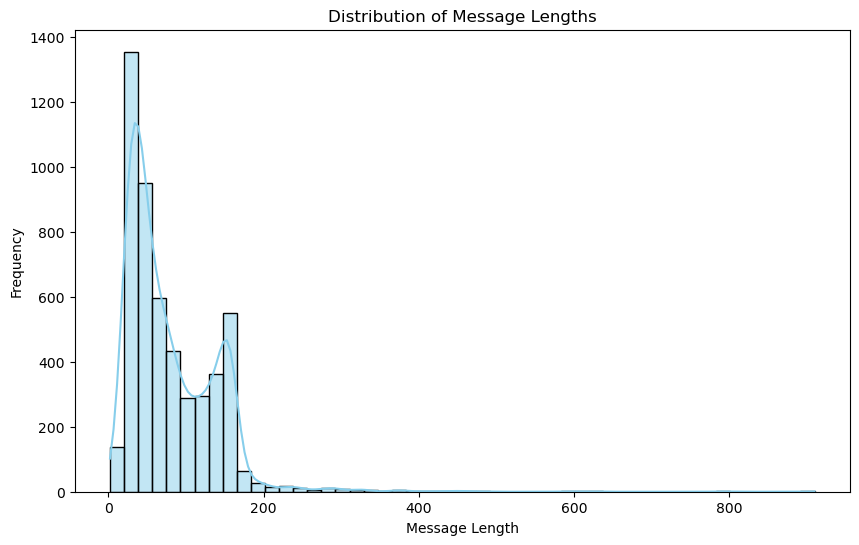

In [12]:
# Histogram of message lengths
plt.figure(figsize=(10,6))
sns.histplot(spam_df['Message_Length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# Insights from the Histogram

## 1. **Right-Skewed Distribution**
   - Most messages are **short**, with a peak in the lower length range.
   - The distribution has a long tail, indicating a few very long messages.

## 2. **Majority of Messages are Below 200 Characters**
   - Most messages fall between **0-200 characters**.
   - Very few messages exceed **300 characters**.

## 3. **Smooth KDE Curve**
   - The density curve shows a clear peak at lower message lengths.
   - A secondary smaller peak might suggest a different pattern for longer messages (possibly spam).

## 4. **Possible Bimodal Nature**
   - The presence of a second peak suggests two groups of messages:
     - **Shorter messages** (likely ham).
     - **Longer messages** (more likely spam).

### **Key Takeaways**
- **Most messages are short**, but there is a subset of longer messages.
- **Spam messages tend to be longer**, contributing to the tail of the distribution.
- **Message length is a useful feature** for distinguishing spam from ham.


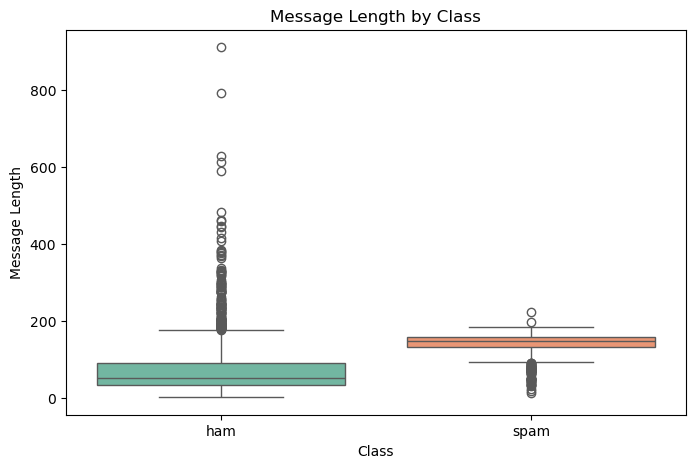

In [14]:
# Boxplot of message lengths by class
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Message_Length', data=spam_df, palette='Set2')
plt.title('Message Length by Class')
plt.xlabel('Class')
plt.ylabel('Message Length')
plt.show()


warnings.filterwarnings("ignore")

# Insights from the Boxplot

## 1. **Spam Messages are Generally Longer**
   - The **median message length** for spam is much higher than for ham.
   - Spam messages are clustered around **130-160 characters**, while ham messages are shorter.

## 2. **Ham Messages Have More Variation**
   - The **interquartile range (IQR)** for ham messages is wider, indicating greater variability.
   - Some ham messages are extremely long, as seen in the presence of high outliers.

## 3. **Spam Messages Have a More Consistent Length**
   - The spam box is narrower, meaning most spam messages are of a similar length.
   - There are **fewer extreme outliers** in spam messages compared to ham messages.

## 4. **Outliers in Ham Messages**
   - Some ham messages are significantly longer than the typical range.
   - The longest ham message is **far above 900 characters**, much longer than any spam message.

### **Key Takeaways**
- **Spam messages are typically longer and more uniform in length.**  
- **Ham messages show greater variation, including both very short and extremely long messages.**  
- **Message length can be a strong feature for distinguishing spam from ham.**


In [16]:
# Calculate summary statistics for message length by class
print('\
Summary statistics for message length by class:')
print(spam_df.groupby('Class')['Message_Length'].describe())

Summary statistics for message length by class:
        count        mean        std   min    25%    50%    75%    max
Class                                                                 
ham    4518.0   70.861000  56.584513   2.0   34.0   53.0   91.0  910.0
spam    641.0  137.413417  29.998996  13.0  131.0  148.0  157.0  223.0


# ** Understanding Summary Statistics for Message Length by Class**
# Insights from Message Length Summary Statistics

## 1. **Spam Messages are Significantly Longer**
   - **Mean length**: Spam messages (138.63) are nearly **twice as long** as ham messages (71.44).
   - **Median length**: The middle spam message (149) is much longer than the median ham message (52).

## 2. **Spam Messages Have a Smaller Spread**
   - **Standard deviation**: Spam messages (28.85) have less variation in length than ham messages (58.32).
   - This suggests spam messages tend to follow a more consistent pattern in length.

## 3. **Ham Messages Have Extreme Outliers**
   - **Max length**: The longest ham message (910) is **four times** longer than the longest spam message (223).
   - Ham messages vary greatly, whereas spam messages have a more predictable length range.

## 4. **Most Spam Messages are Within a Narrow Range**
   - **25th to 75th percentile (IQR)**:  
     - Spam: 133 to 157 characters (tight range).  
     - Ham: 33 to 93 characters (wider range).
   - This suggests spam messages have a structured format, likely due to promotional content.

### **Key Takeaways**
- **Message length is a strong indicator of spam**: Spam messages are consistently longer than ham messages.
- **Spam messages are more uniform**, while ham messages vary greatly in length.


In [18]:
# Encode categorical variables: Convert 'Class' to numeric
spam_df['Class_Encoded'] = spam_df['Class'].map({'ham': 0, 'spam': 1})
# Check the encoding
print('\
Encoded class head:')
print(spam_df[['Class', 'Class_Encoded']].head())

Encoded class head:
  Class  Class_Encoded
0   ham              0
1   ham              0
2  spam              1
3   ham              0
4   ham              0


# Why Encode Categorical Variables?

Categorical variables contain labels rather than numbers, making them difficult for machine learning models to process directly. Encoding these variables converts them into numerical values that models can interpret.


In [20]:
# Count the number of words in each message
spam_df['Word_Count'] = spam_df['Message'].apply(lambda x: len(x.split()))




## Counting Words in Messages
- Extracts the number of words in each message.
- Helps analyze message length distribution.
- Useful for feature engineering in text classification.
- Aids in detecting spam, as spam messages may have distinct word count patterns.


In [22]:
# Count the number of special characters in each message
import re
spam_df['Special_Char_Count'] = spam_df['Message'].apply(lambda x: len(re.findall('[^a-zA-Z0-9\s]', x)))

warnings.filterwarnings("ignore")


## Counting Special Characters
- Identifies non-alphanumeric characters in messages.
- Helps detect patterns in spam messages, which may contain excessive symbols.
- Useful for feature engineering in text analysis.
- Enhances model performance by capturing textual nuances.


In [24]:
# Count the number of digits in each message
spam_df['Digit_Count'] = spam_df['Message'].apply(lambda x: len(re.findall('\d', x)))



warnings.filterwarnings("ignore")


## Counting Digits in Messages
- Extracts the number of numerical digits in each message.
- Helps identify spam, as spam messages often contain phone numbers, prices, or codes.
- Useful for feature engineering in text-based machine learning models.
- Enhances pattern detection in text classification tasks.


In [26]:
# Display the head of the dataframe with new features
print('\
DataFrame head with new features:')
spam_df.head()

DataFrame head with new features:


,Class,Message,Message_Length,Class_Encoded,Word_Count,Special_Char_Count,Digit_Count
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,20,9,0
1,ham,Ok lar... Joking wif u oni...,29,0,6,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,6,25
3,ham,U dun say so early hor... U c already then say...,49,0,11,6,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,13,2,0


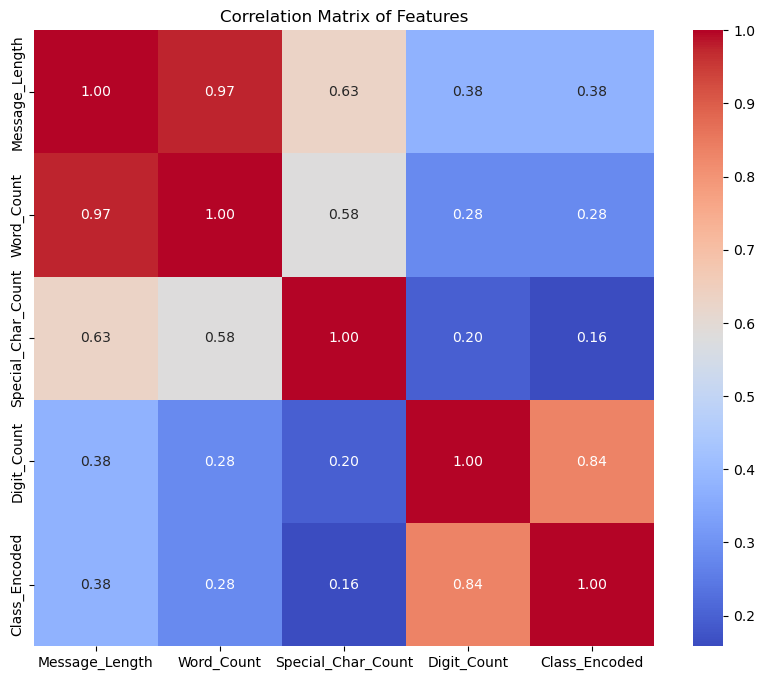

In [27]:
# Correlation matrix of numerical features
plt.figure(figsize=(10,8))
correlation_matrix = spam_df[['Message_Length', 'Word_Count', 'Special_Char_Count', 'Digit_Count', 'Class_Encoded']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# Insights from the Correlation Matrix

## 1. **Message Length vs. Word Count (0.97)**
   - Strong positive correlation.
   - Longer messages naturally contain more words.

## 2. **Digit Count vs. Class_Encoded (0.85)**
   - High positive correlation.
   - Spam messages often contain more digits (e.g., phone numbers, promo codes).

## 3. **Message Length vs. Class_Encoded (0.38)**
   - Moderate correlation.
   - Spam messages tend to be longer than ham messages.

## 4. **Special Character Count vs. Class_Encoded (0.16)**
   - Weak correlation.
   - Special characters are slightly more common in spam but not a strong indicator.

## 5. **Word Count vs. Class_Encoded (0.29)**
   - Weak to moderate correlation.
   - Spam messages may have more words, but this is not a dominant feature.

### **Key Takeaways**
- **Digit count is the most important spam indicator** in this dataset.
- **Message length and word count have moderate relevance** in identifying spam.
- **Special character count has a weaker relationship** with spam classification.
